* Flight fare prediction dataset is to predict prices for different airlines based on the details of independent variables.
* This is **Supervised Machine Learning Regression Algorithm** 

In [1]:
!pip install sweetviz

In [2]:
pwd

'/Users/mac/Documents/datascienceonecampus/DatamitesTraining/Datamites Projects/Flight Price Prediction'

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df=pd.read_excel("Flight_Fare.xlsx")
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

##  Basic check

In [5]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [6]:
df.shape  

(10683, 11)

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()  # This shows statistical info for numerical data 

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [9]:
df.describe(include='O')  # This gives info about categorical data

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count     10683        10683    10683       10682           10683  
unique      222         1343      368           5              10  
top       18:55        19:00   2h 50m      1 stop         No info  
freq        233          423      550        5625            8345

In [10]:
df.isnull().sum()  # Route and Total stops having null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# EDA - Exploratory Data Analysis

 * This is for Univariate analysis
 * Using sweetviz we can know each features *null value, Maximum count and Datatype*.
 

In [11]:
import sweetviz as sv

In [12]:
df_report=sv.analyze(df)
df_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Airline

In [13]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

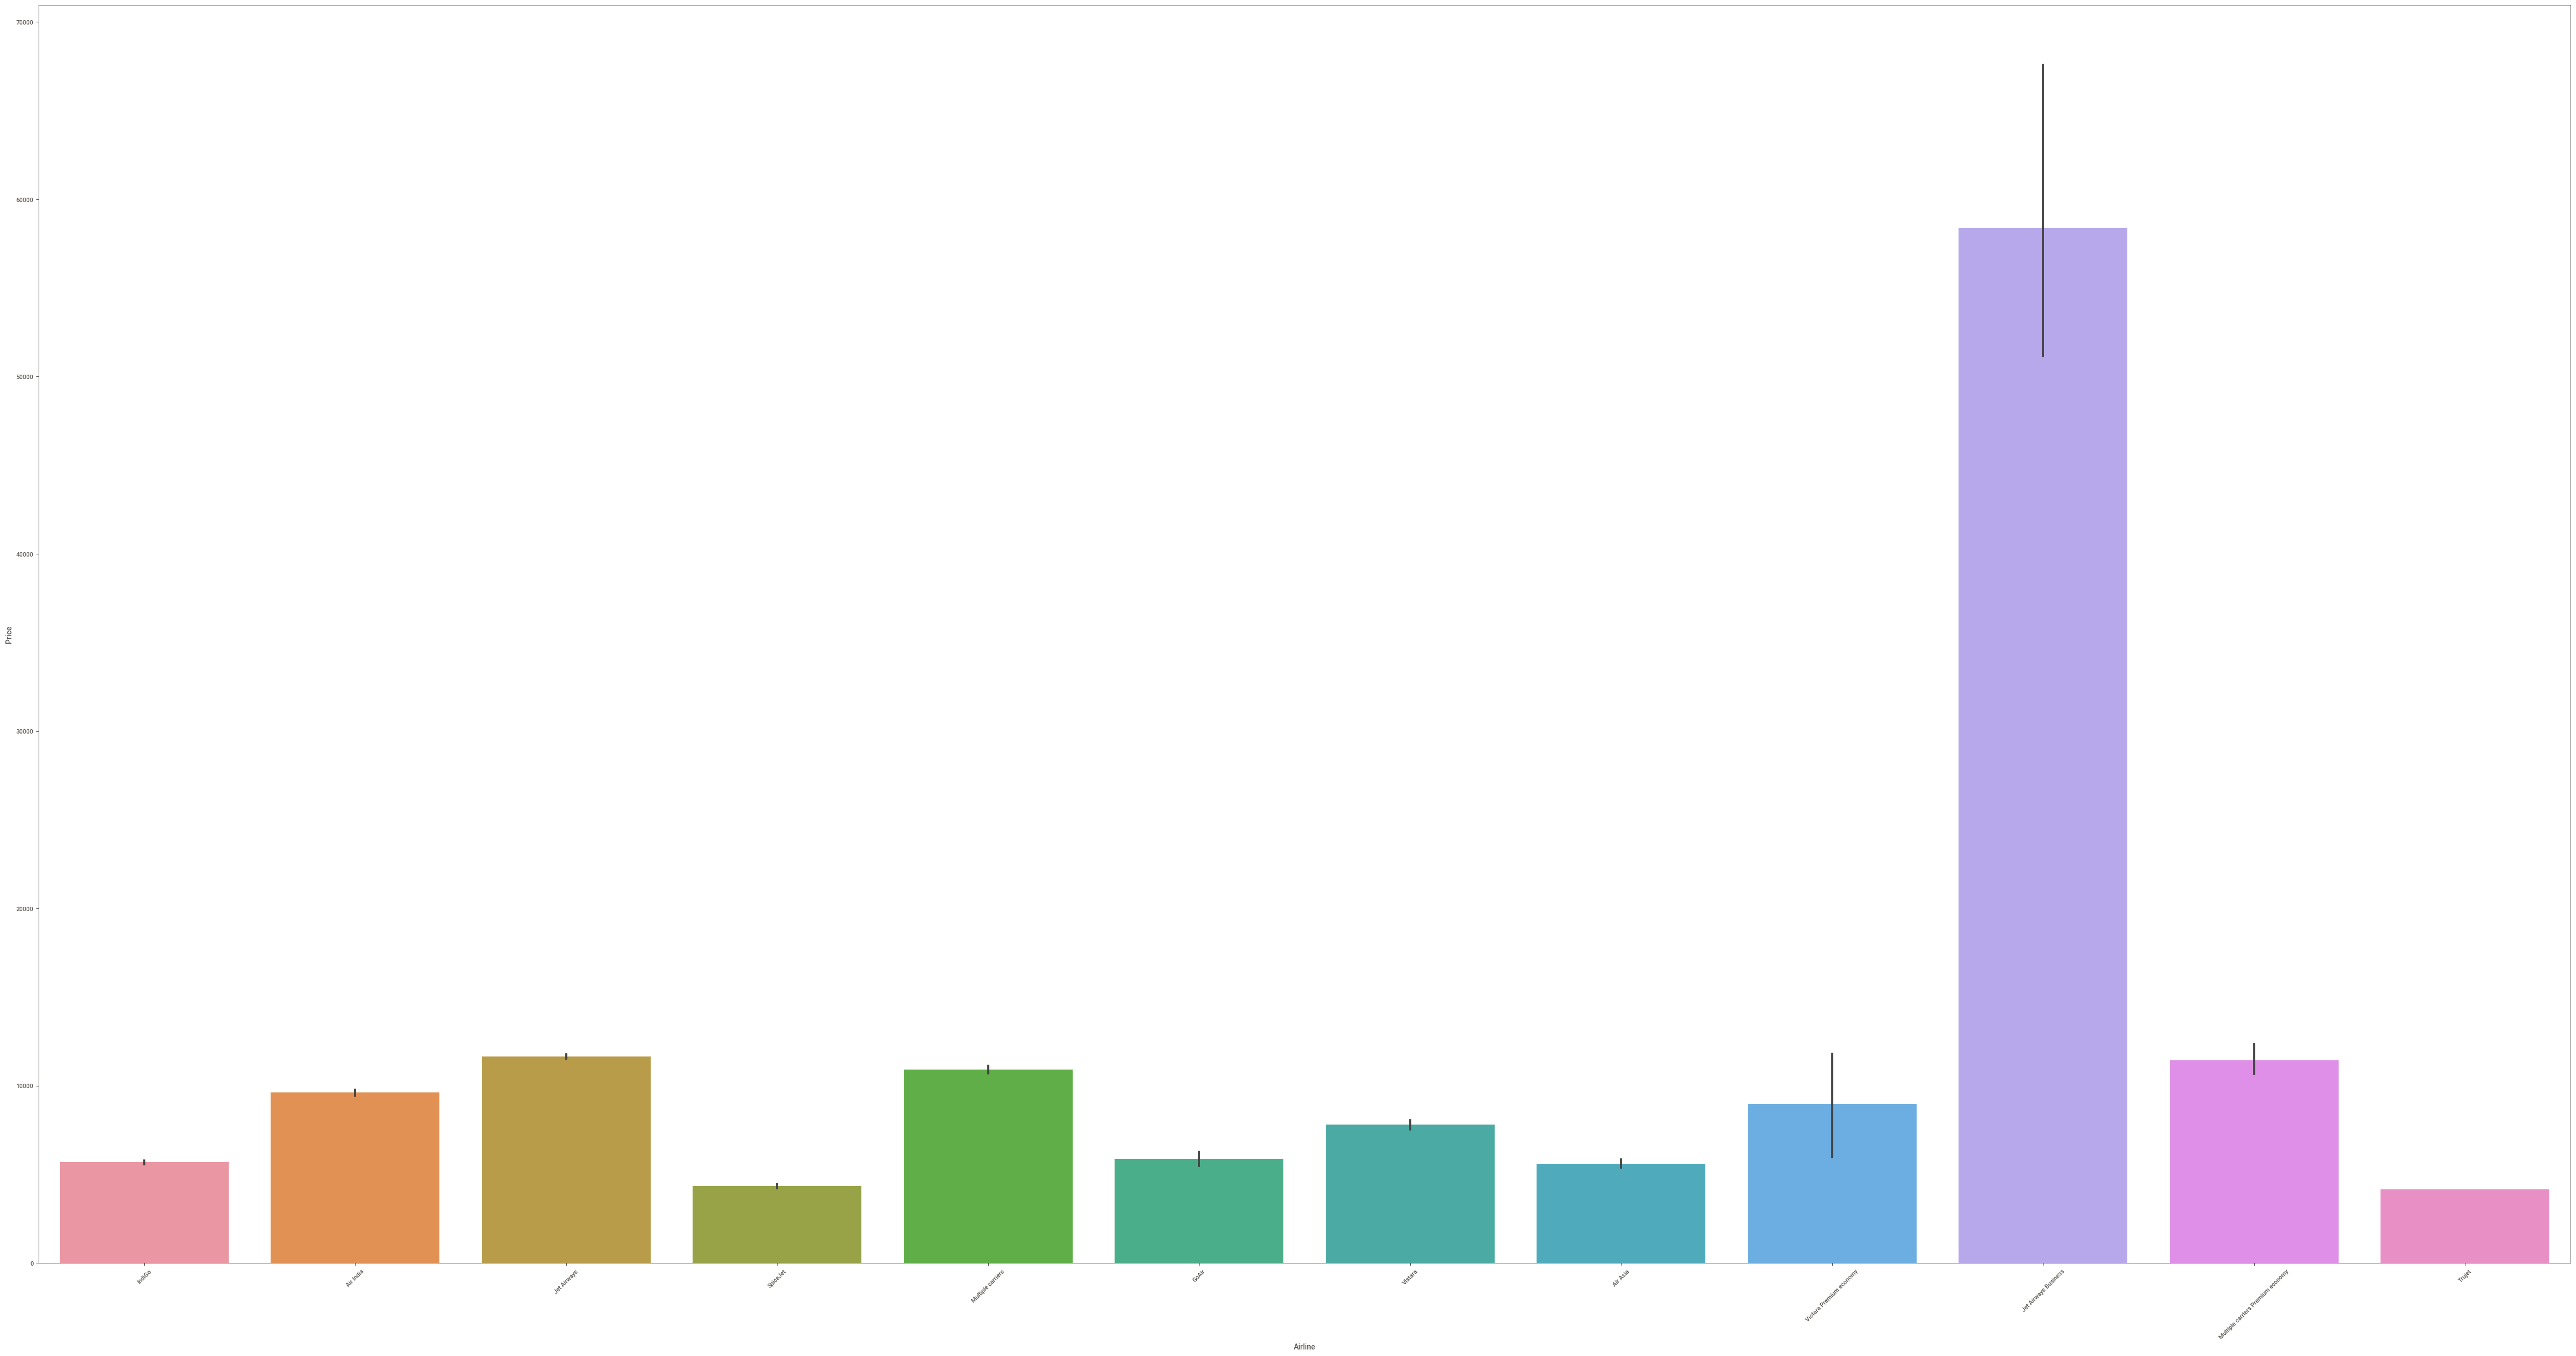

In [14]:
plt.figure(figsize=(60,30))
sns.barplot(x=df["Airline"],y=df["Price"])
sns.set(font_scale=9)
plt.xticks(rotation=45)
plt.show()

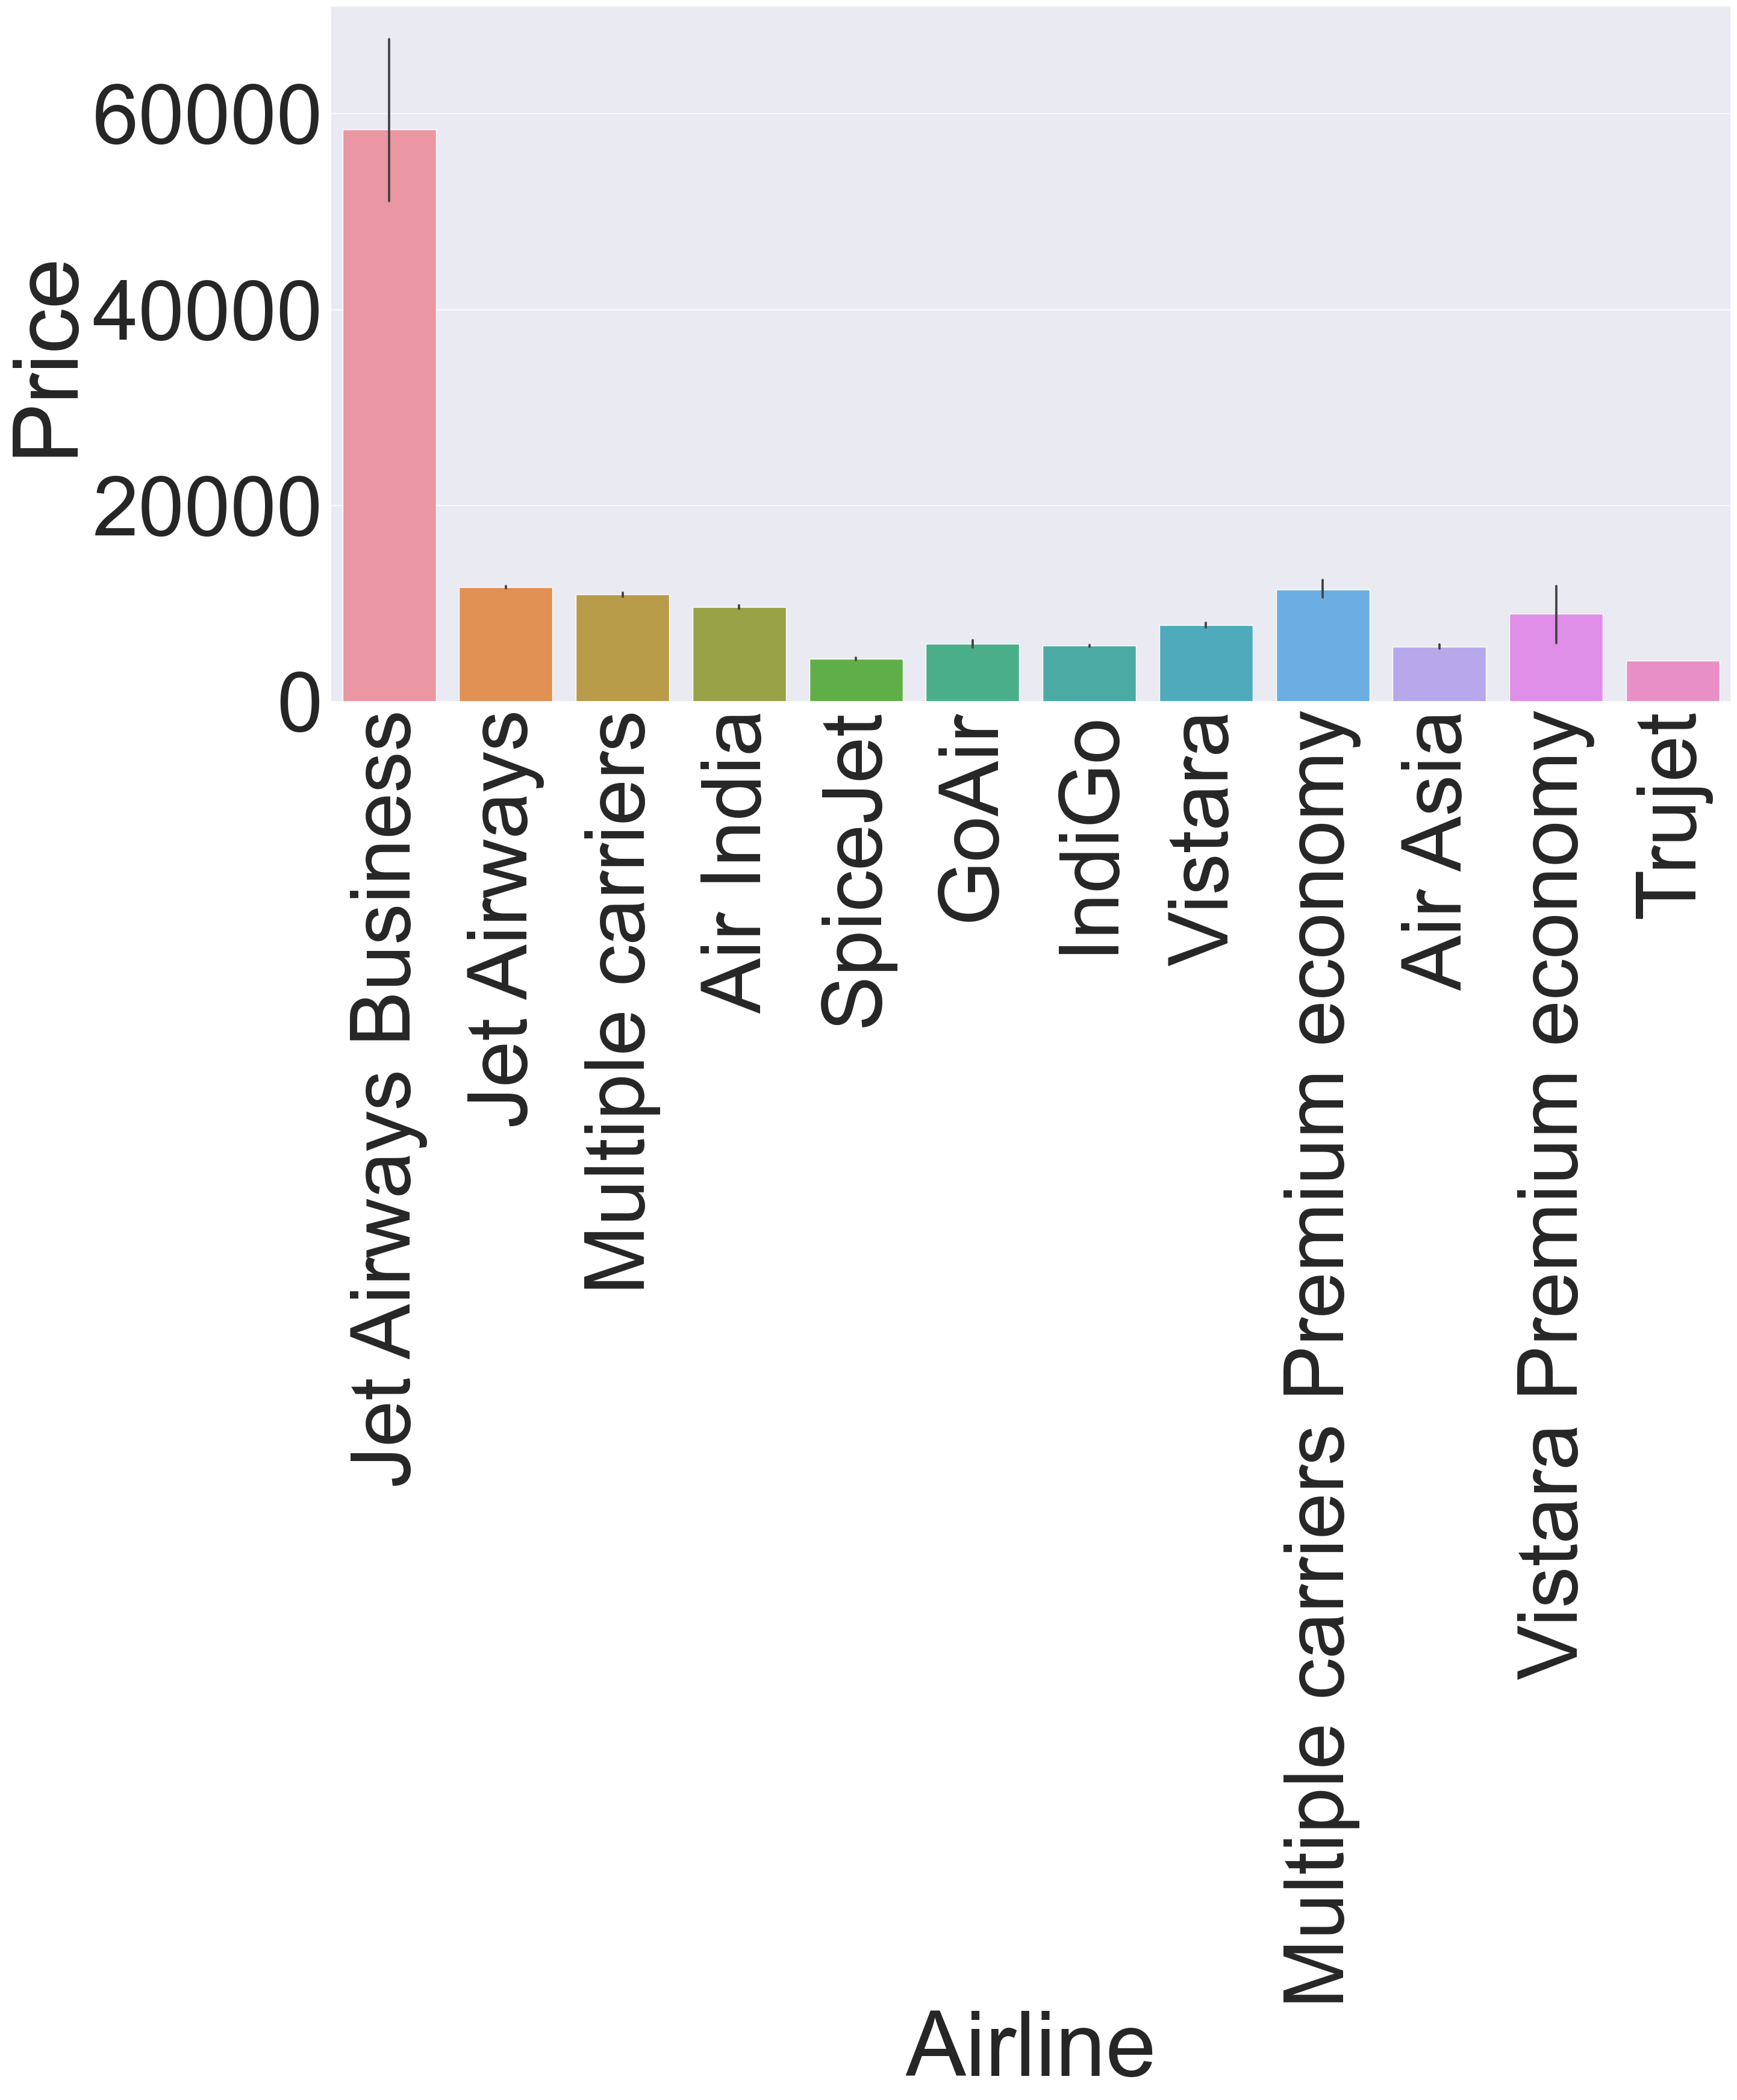

In [15]:
plt.figure(figsize=(30,15))
sns.barplot(x='Airline',y='Price', data=df.sort_values('Price',ascending= False))
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

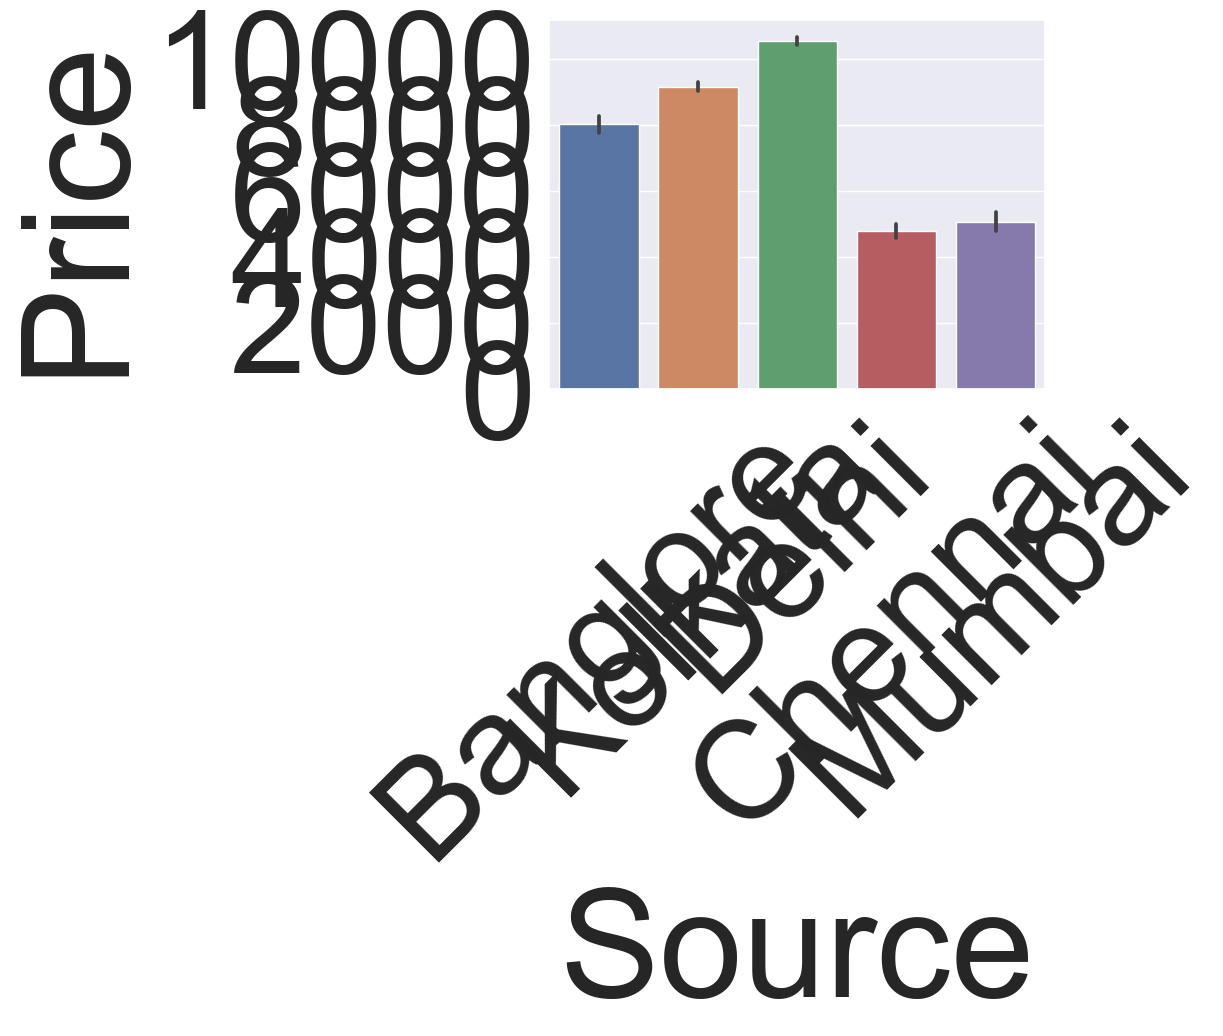

In [16]:
sns.barplot(x=df['Source'],y= df['Price'])
sns.set(font_scale=2)
plt.xticks(rotation=45)

In [17]:
 df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source

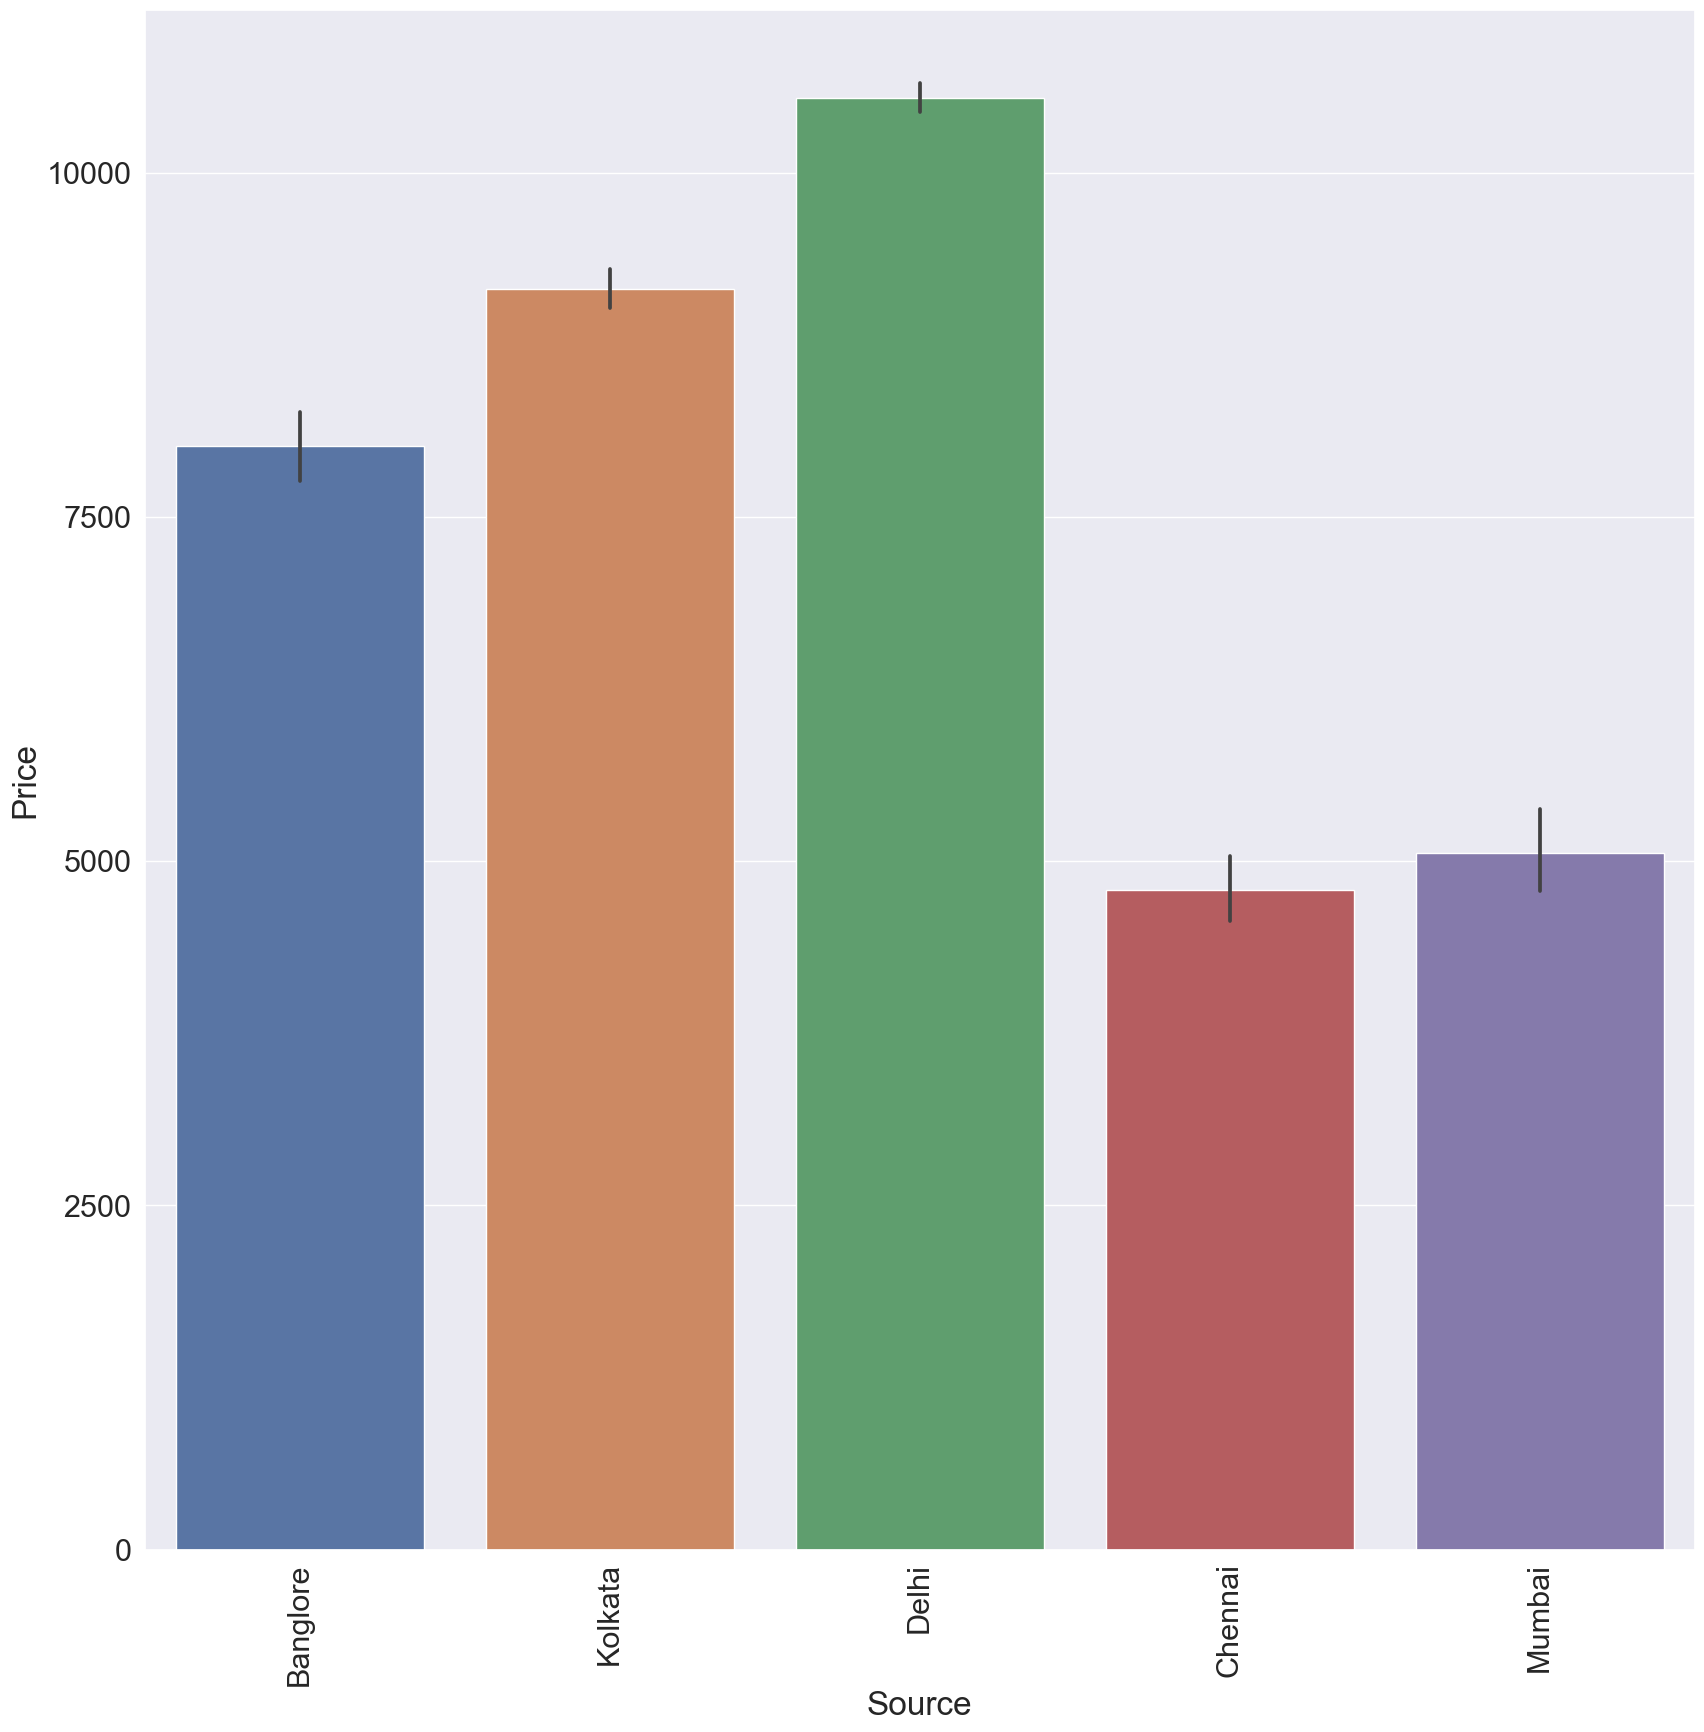

In [18]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['Source'],y=df['Price'])
sns.set(font_scale=9)
plt.xticks(rotation=90)
plt.show()

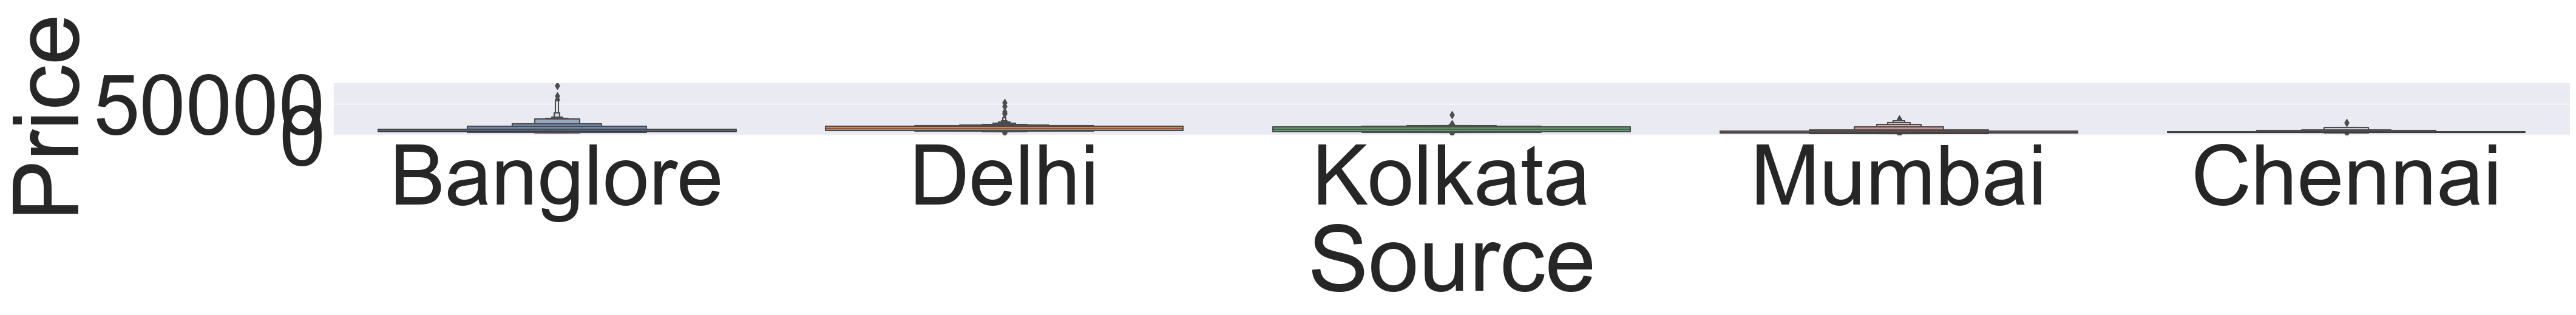

In [19]:
sns.catplot(x='Source',y='Price', data=df.sort_values('Price',ascending= False), kind='boxen',height=6, aspect=7)
plt.show()

### Destination

In [20]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

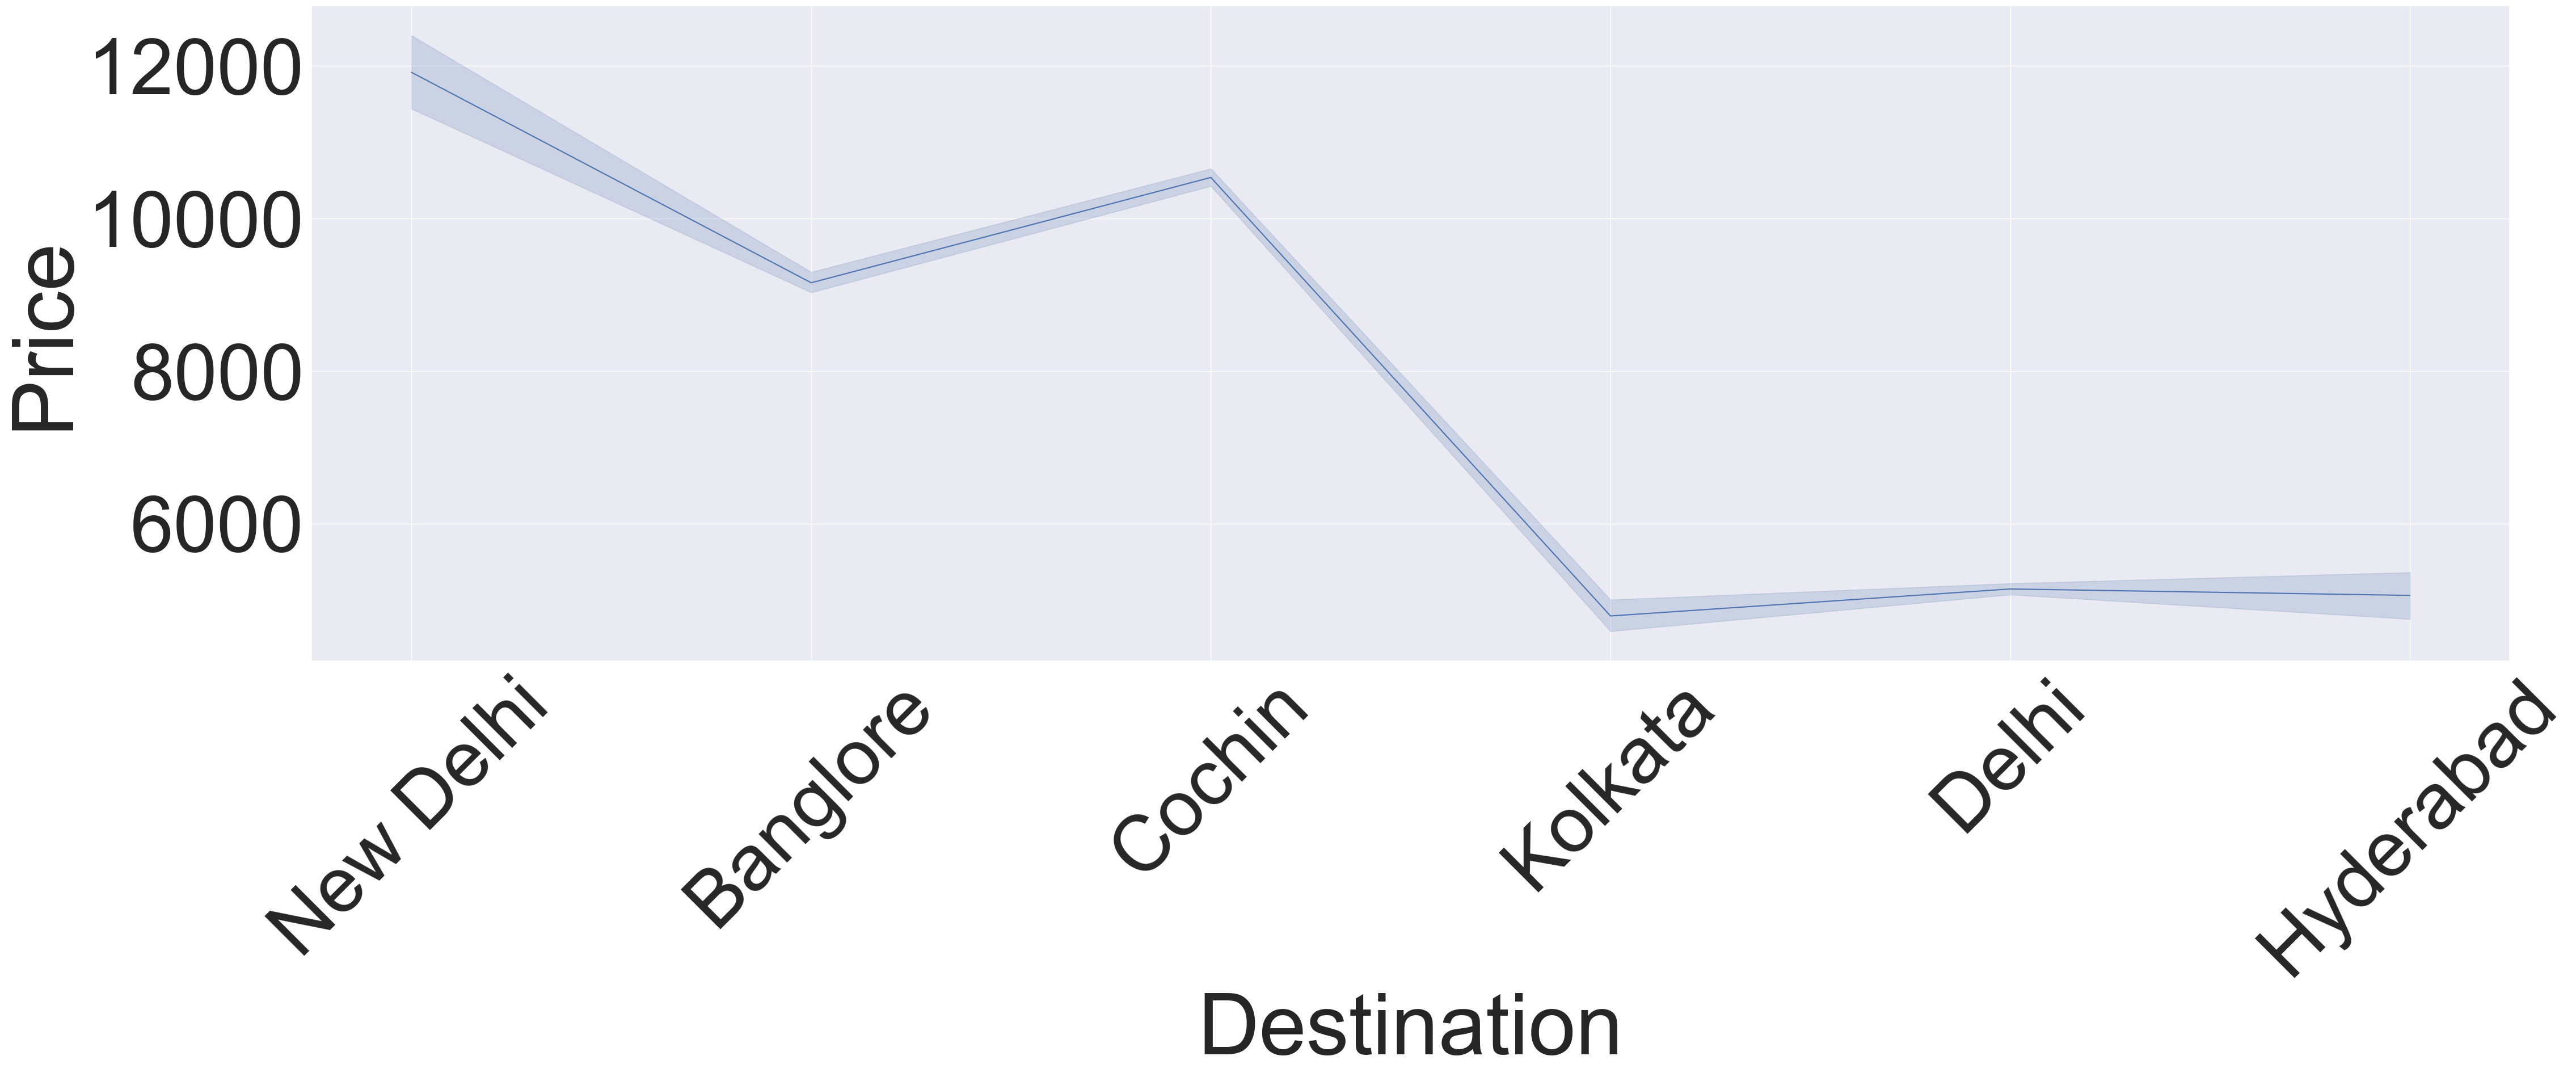

In [21]:
plt.figure(figsize=(50,15))
sns.lineplot(x=df["Destination"],y=df["Price"],)
sns.set(font_scale=7)
plt.xticks(rotation=45)
plt.show()

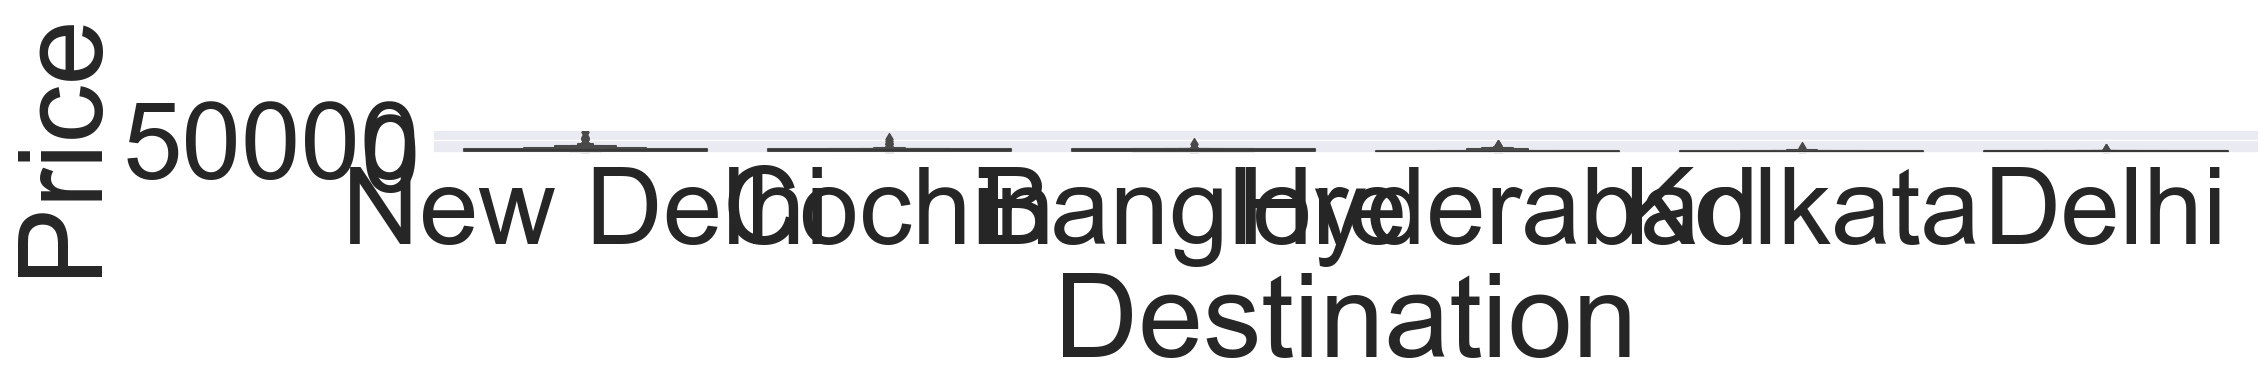

In [22]:
sns.catplot(x='Destination',y='Price', data=df.sort_values('Price',ascending= False), kind='boxen',height=5, aspect=5 )
plt.show()

In [23]:
#Delhi and New Delhi are generally considered to be the same.
#Replacing NewDelhi with Delhi(Source and Destination having Delhi with maximum count)

df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

### Date of journey- Day and month

In [24]:
#day
df['Journey_Day']= pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
#month
df['Journey_month']= pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month


In [25]:
df.drop(('Date_of_Journey'), axis=1, inplace=True)

In [26]:
df.head(3)

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore       Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_Day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   
2  04:25 10 Jun      19h     2 stops         No info  13882            9   

   Journey_month  
0              3  
1              5  
2              6

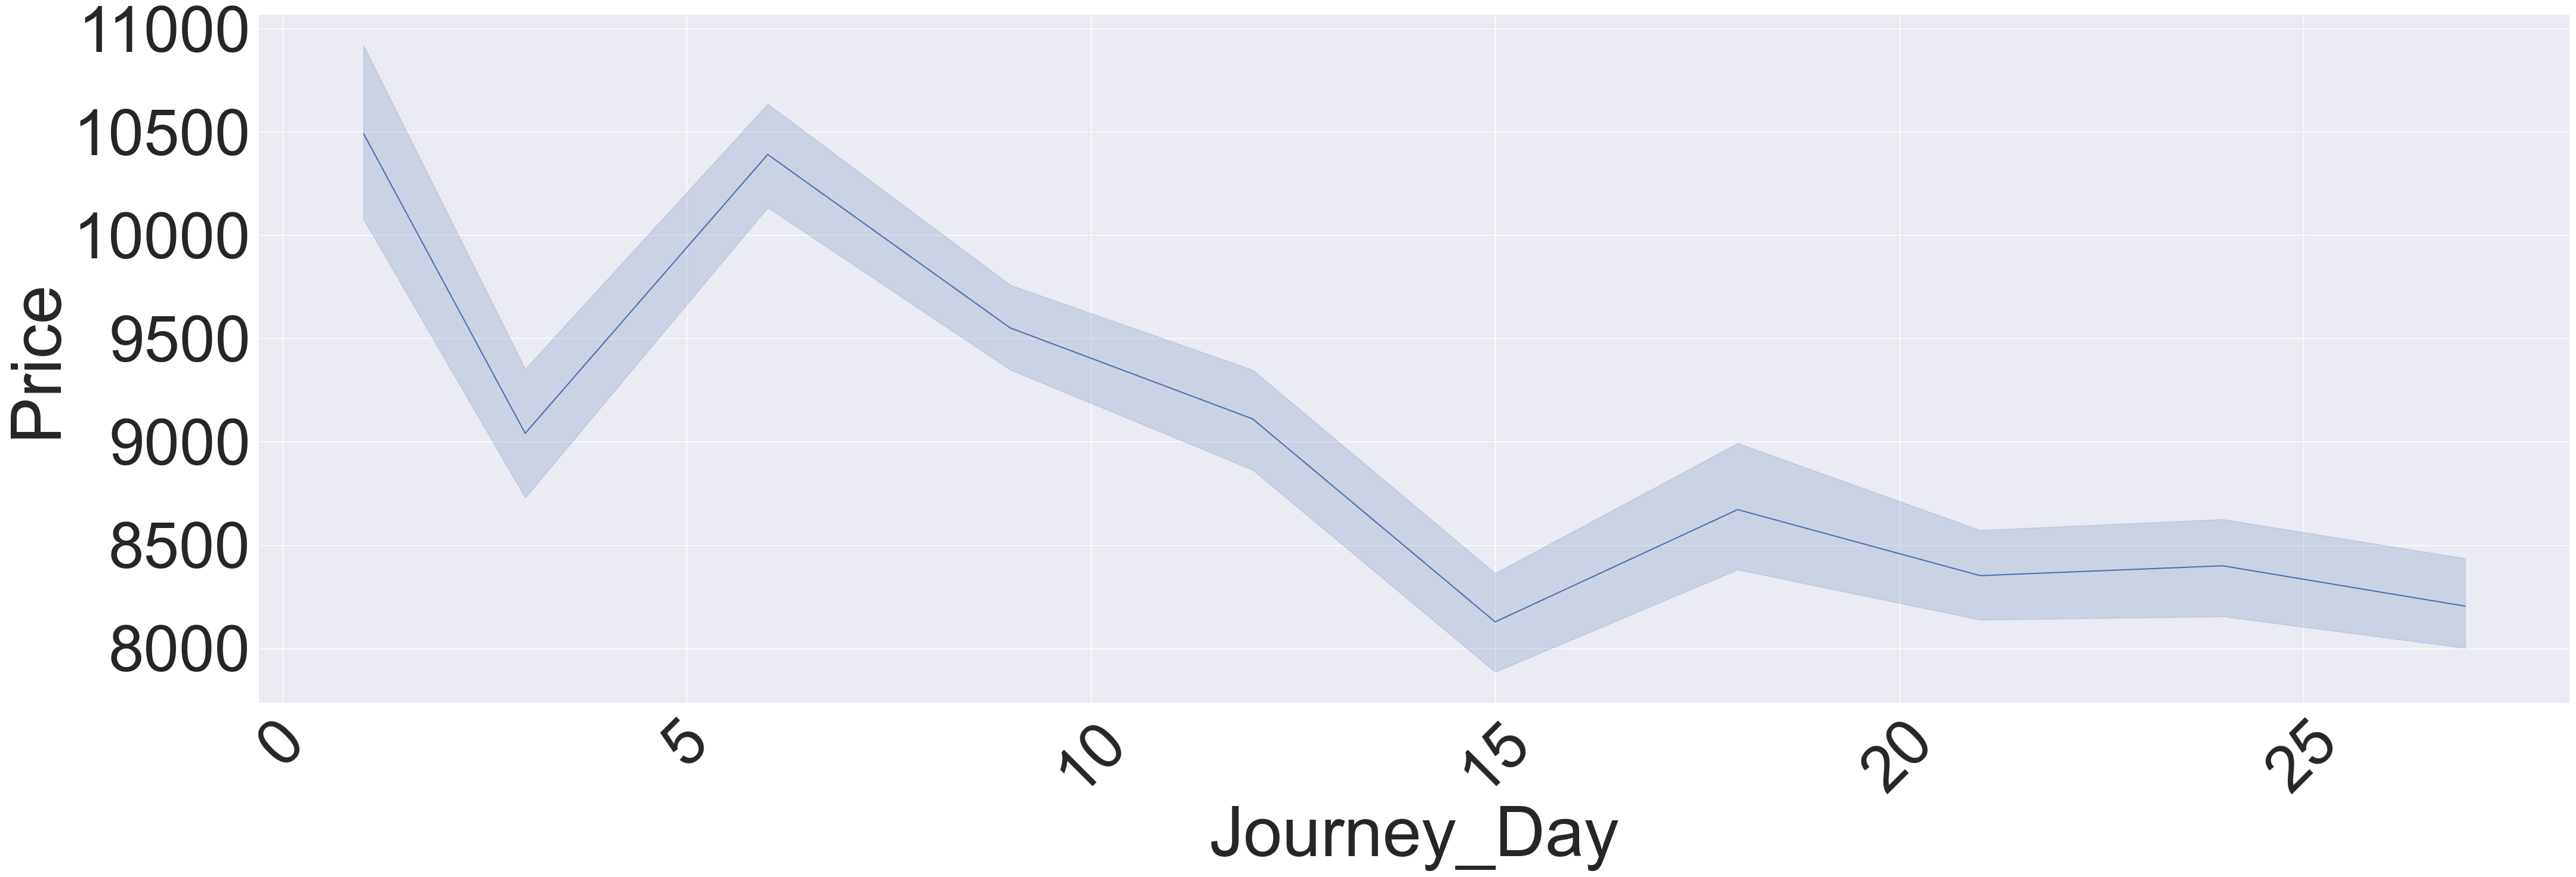

In [27]:
plt.figure(figsize=(50,15))
sns.lineplot(x=df['Journey_Day'], y=df['Price'])
sns.set(font_scale=5)
plt.xticks(rotation=45)
plt.show()

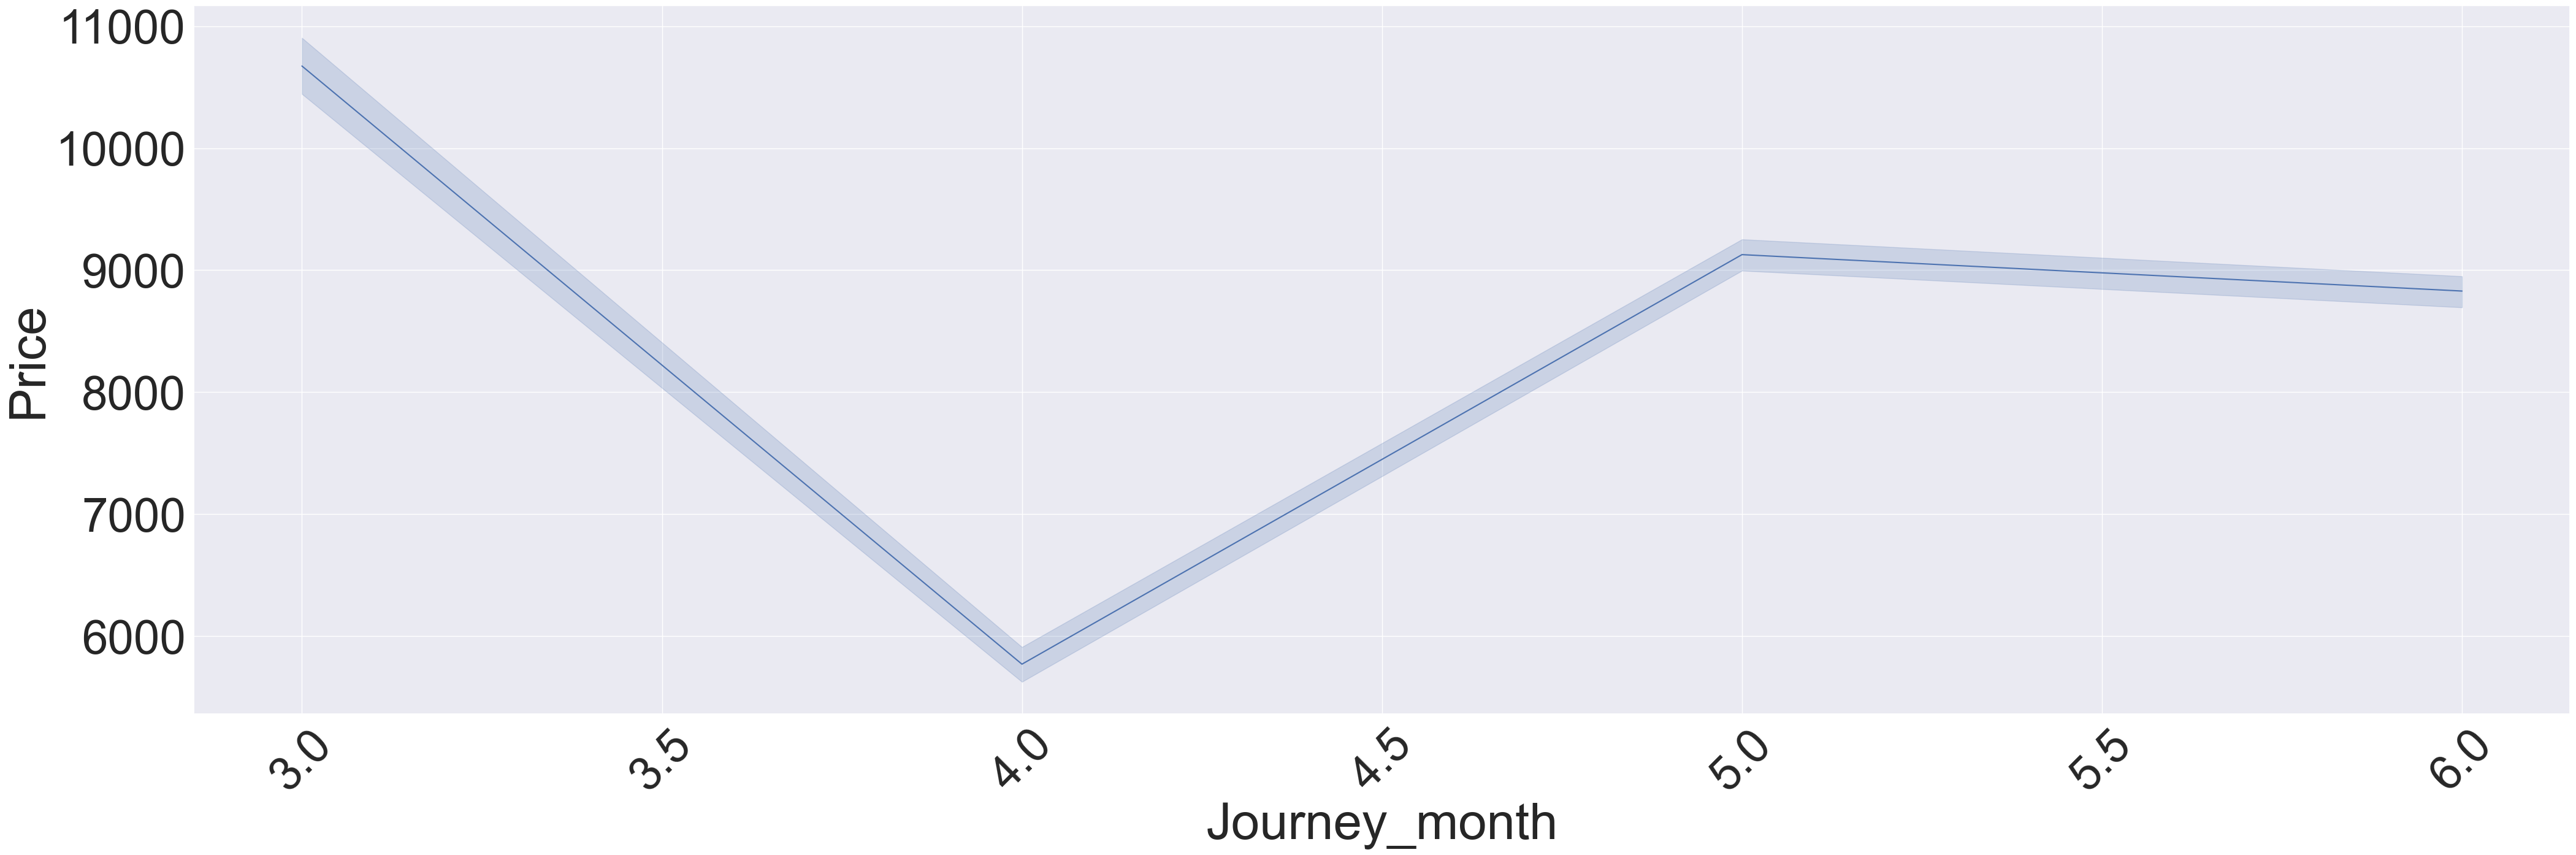

In [28]:
plt.figure(figsize=(50,15))
sns.lineplot(x=df['Journey_month'], y=df['Price'])
sns.set(font_scale=3)
plt.xticks(rotation=45)
plt.show()


## Dep Time to Hour and Min

In [29]:
#dep hour
df['Dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
#minute
df['Dep_min']= pd.to_datetime(df['Dep_Time']).dt.minute

In [30]:

df.drop(['Dep_Time'], axis= 1, inplace= True)

In [31]:
df.head(3)

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore       Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   

  Duration Total_Stops Additional_Info  Price  Journey_Day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25

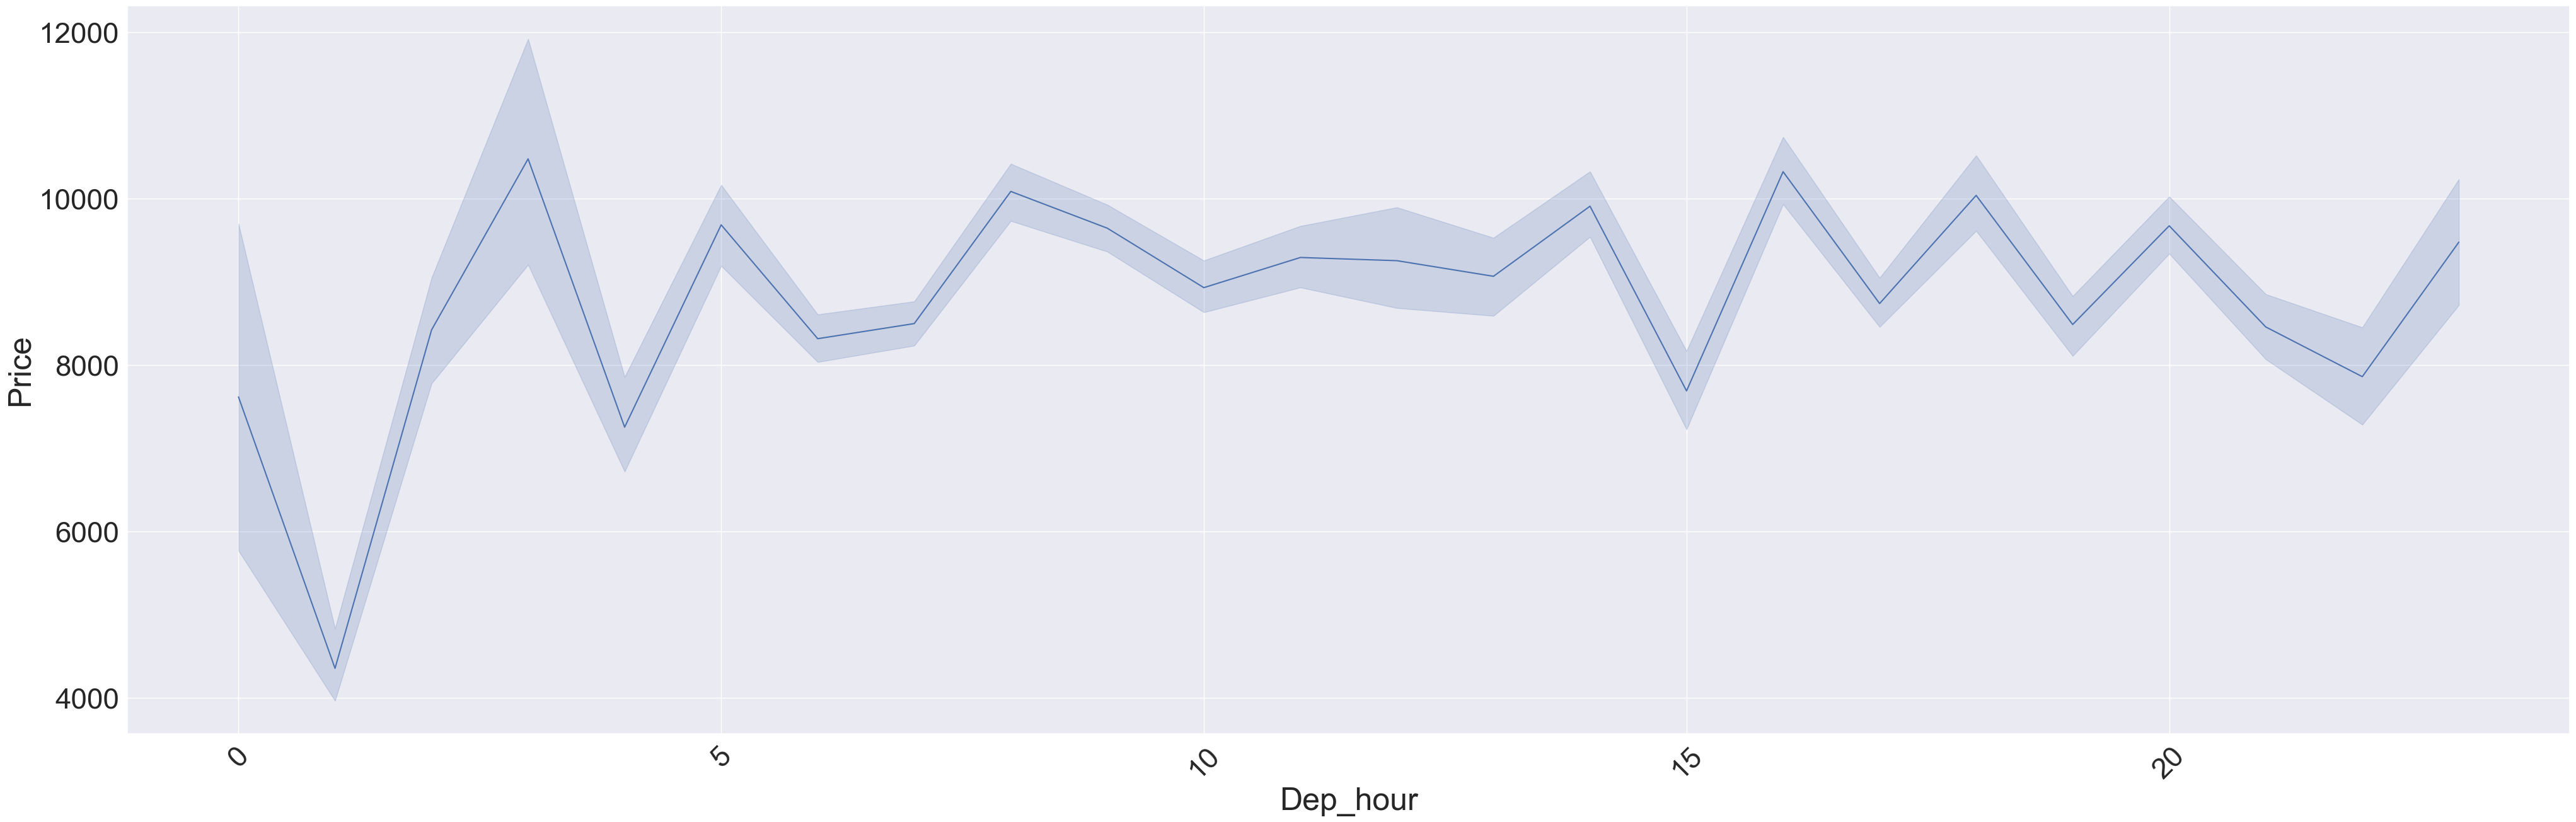

In [32]:
plt.figure(figsize=(50,15))
sns.lineplot(x=df['Dep_hour'], y=df['Price'])
sns.set(font_scale=5)
plt.xticks(rotation=45)
plt.show()

##  Arrival Time to hour and min

In [33]:
#hour
df['Arrival_hr']= pd.to_datetime(df['Arrival_Time']).dt.hour
#min
df['Arrival_min']= pd.to_datetime(df['Arrival_Time']).dt.minute

In [34]:
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [35]:
df.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore       Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  Journey_Day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   

   Dep_min  Arrival_hr  Arrival_min  
0       20           1           10  
1       50          13           15

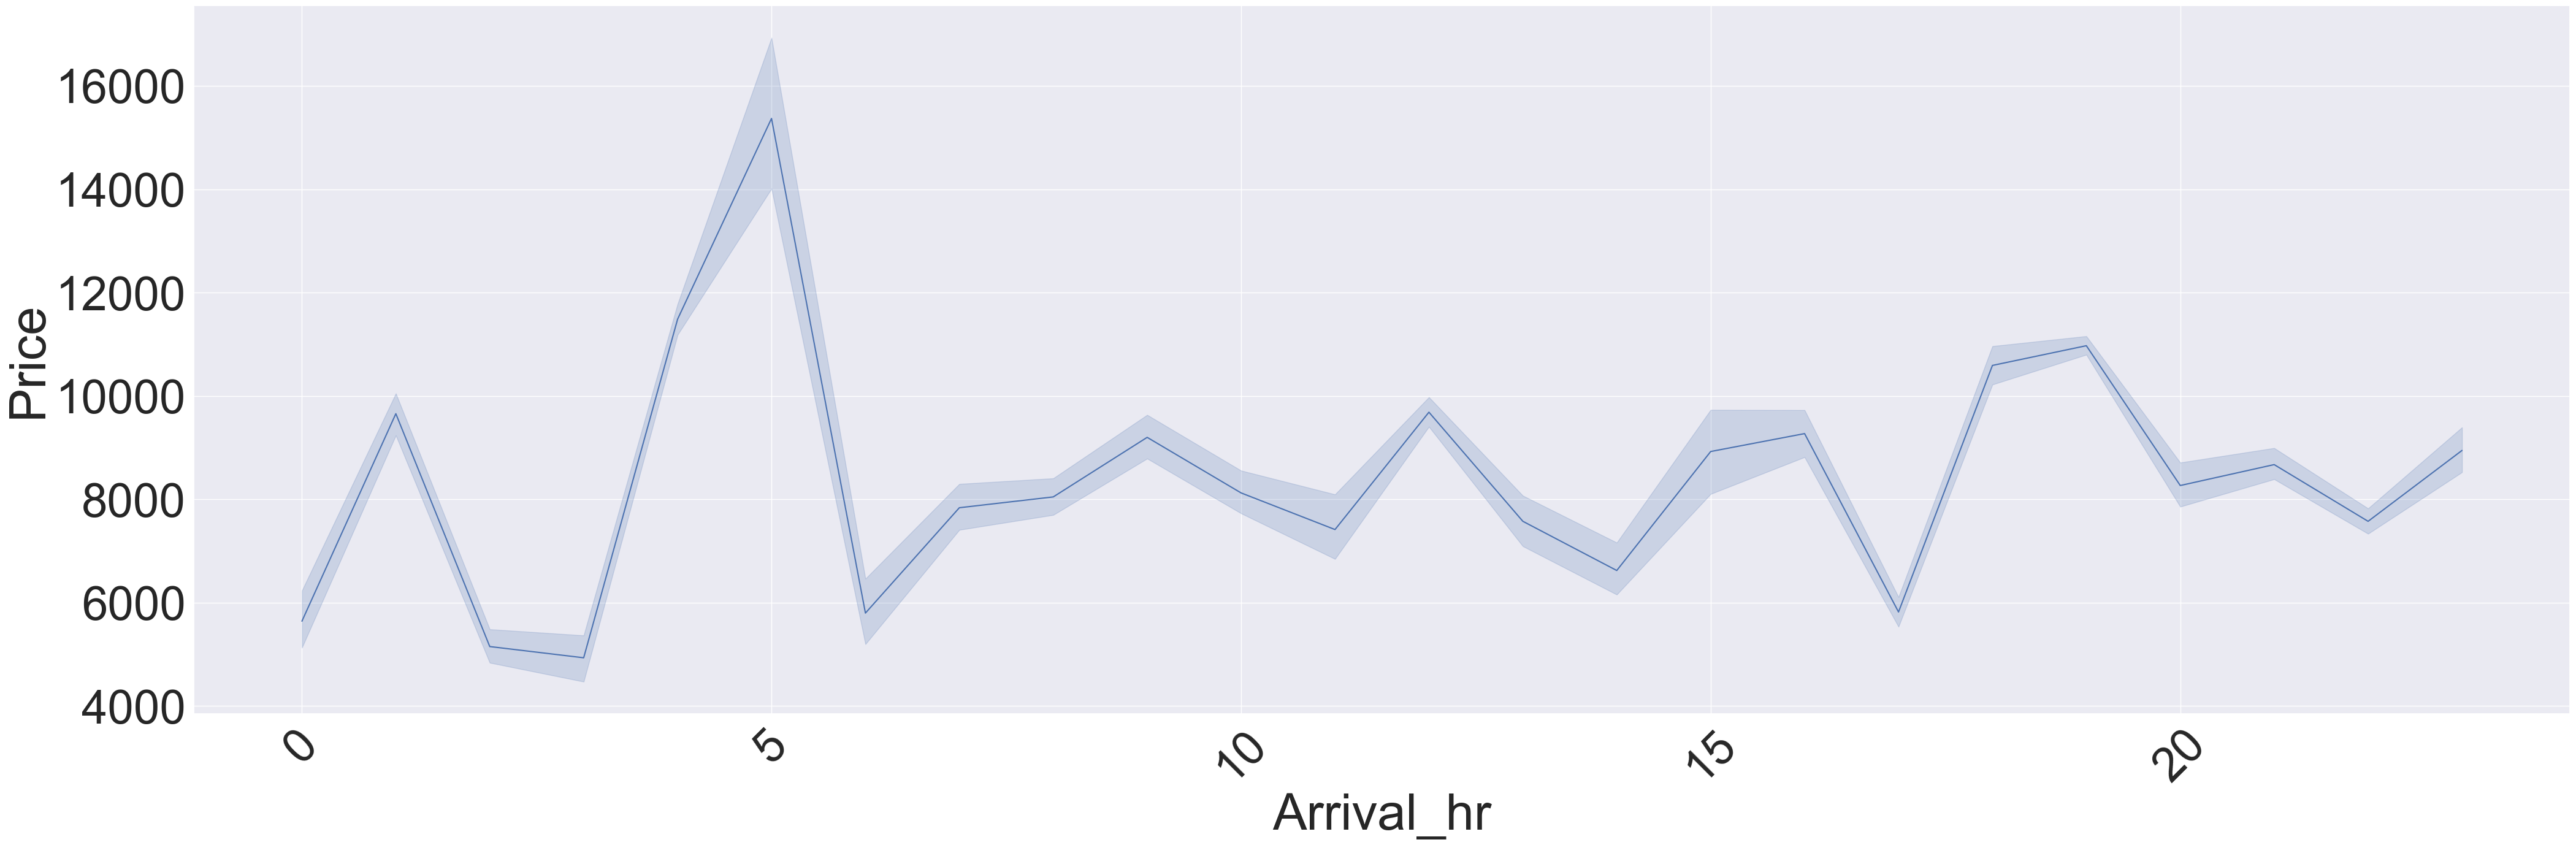

In [36]:
plt.figure(figsize=(50,15))
sns.lineplot(x=df['Arrival_hr'], y=df['Price'])
sns.set(font_scale=3)
plt.xticks(rotation=45)
plt.show()

In [37]:
df["Duration"] = df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [38]:
df

Airline    Source Destination                  Route  Duration  \
0           IndiGo  Banglore       Delhi              BLR → DEL       170   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR       445   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1140   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR       325   
4           IndiGo  Banglore       Delhi        BLR → NAG → DEL       285   
...            ...       ...         ...                    ...       ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR       150   
10679    Air India   Kolkata    Banglore              CCU → BLR       155   
10680  Jet Airways  Banglore       Delhi              BLR → DEL       180   
10681      Vistara  Banglore       Delhi              BLR → DEL       160   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK       500   

      Total_Stops Additional_Info  Price  Journey_Day  Journey_month  \
0        non-stop         No info   3897           24              3   
1         2 stops         No info   7662            1              5   
2         2 stops         No info  13882            9              6   
3          1 stop         No info   6218           12              5   
4          1 stop         No info  13302            1              3   
...           ...             ...    ...          ...            ...   
10678    non-stop         No info   4107            9              4   
10679    non-stop         No info   4145           27              4   
10680    non-stop         No info   7229           27              4   
10681    non-stop         No info  12648            1              3   
10682     2 stops         No info  11753            9              5   

       Dep_hour  Dep_min  Arrival_hr  Arrival_min  
0            22       20           1           10  
1             5       50          13           15  
2             9       25           4           25  
3            18        5          23           30  
4            16       50          21           35  
...         ...      ...         ...          ...  
10678        19       55          22           25  
10679        20       45          23           20  
10680         8       20          11           20  
10681        11       30          14           10  
10682        10       55          19           15  

[10683 rows x 14 columns]

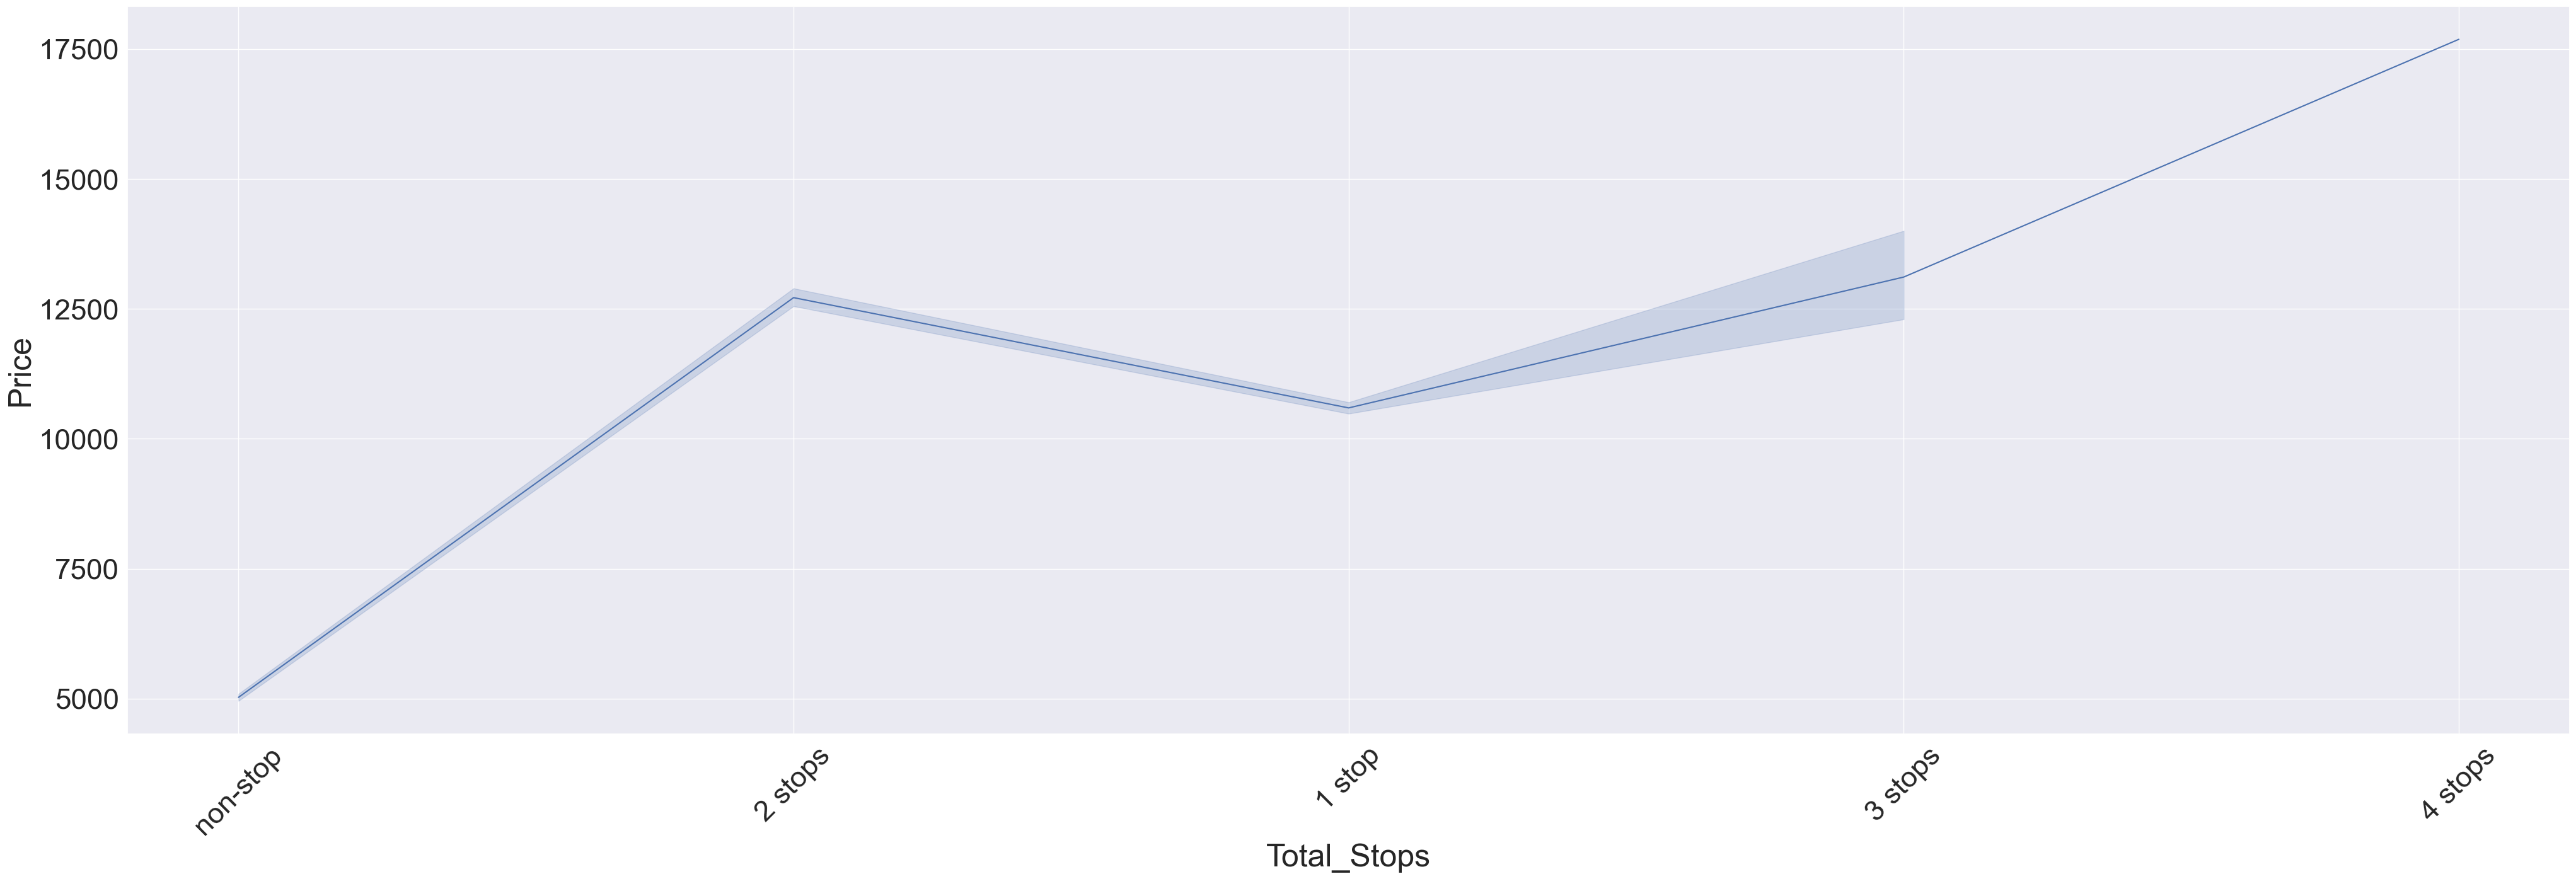

In [39]:

plt.figure(figsize=(50,15))
sns.lineplot(x=df['Total_Stops'], y=df['Price'])
sns.set(font_scale=6)
plt.xticks(rotation=45)
plt.show()

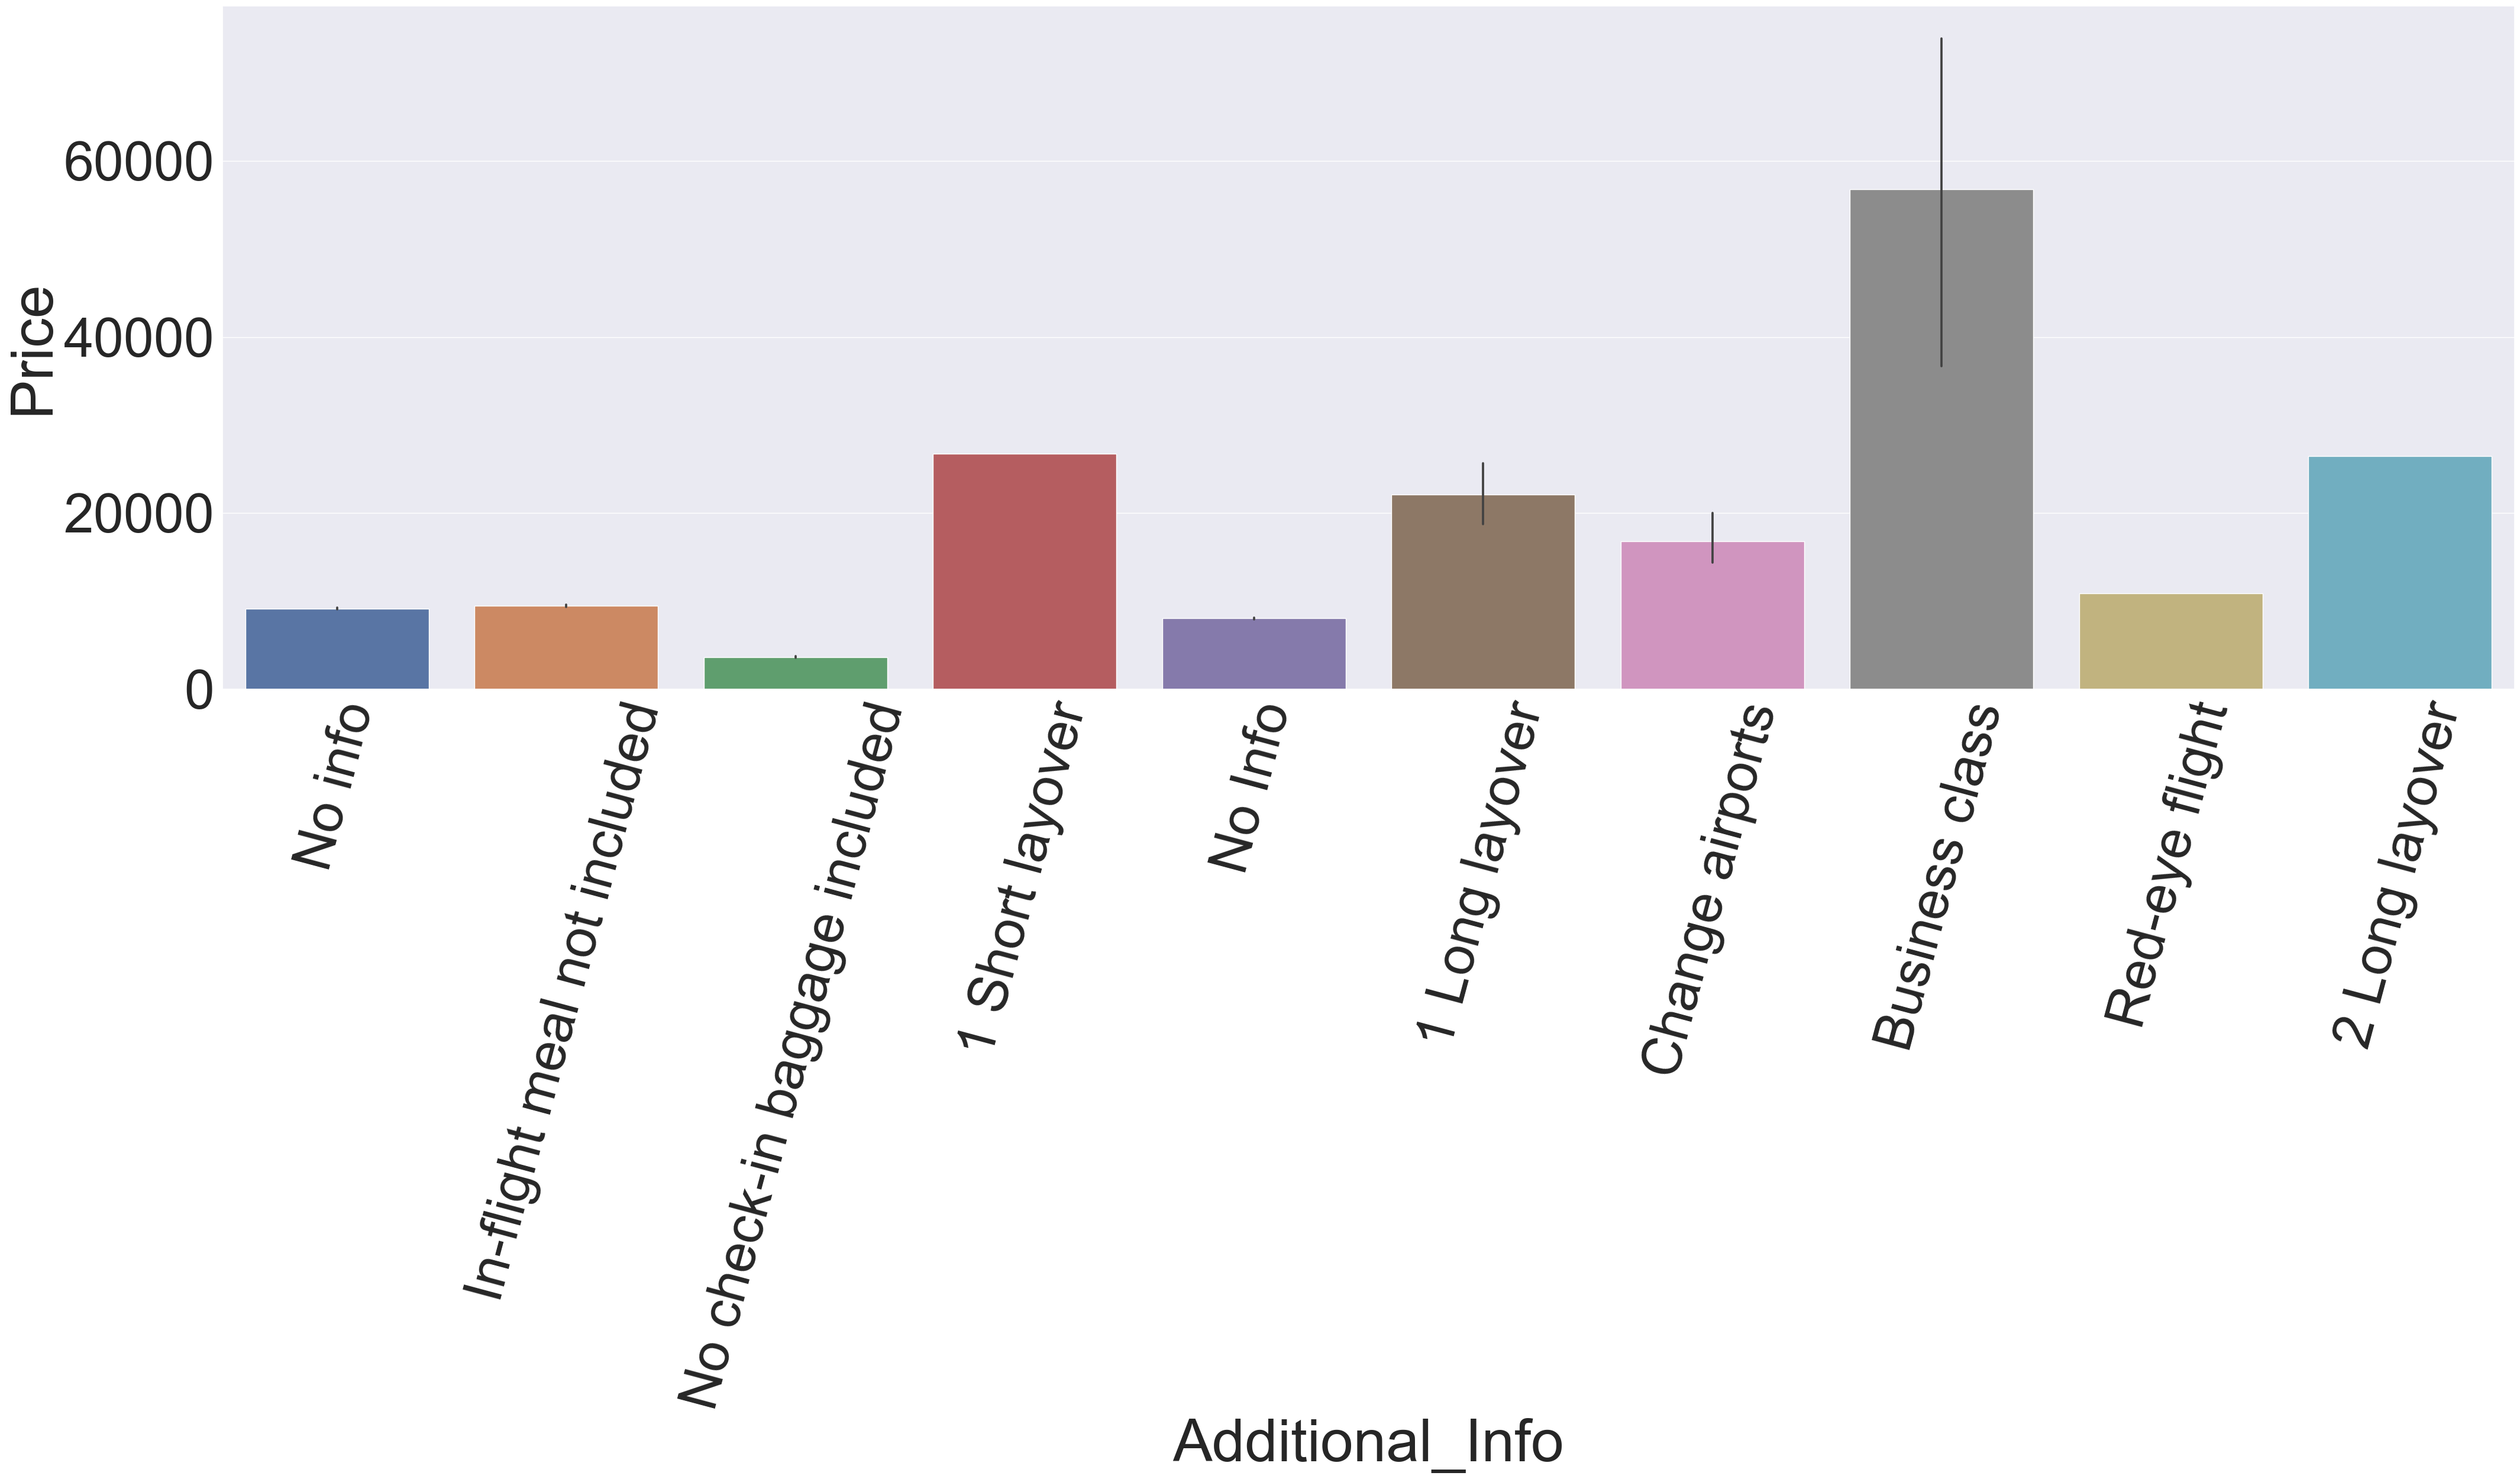

In [40]:
plt.figure(figsize=(50,15))
sns.barplot(x='Additional_Info', y='Price', data=df)
sns.set(font_scale=6)
plt.xticks(rotation=75)
plt.show()

In [ ]:
sns.pairplot(df)
plt.xticks(rotation=45)

# Feature engg

In [ ]:
df.isnull().sum()

In [ ]:
df.Route.value_counts()

In [ ]:
df.Route.isnull()

In [ ]:
df.loc[df.Route.isnull(),'Route'] ='DEL → BOM → COK'

In [ ]:
df.Total_Stops.value_counts()

In [ ]:
df.Total_Stops.isnull()
df.loc[df.Total_Stops.isnull(), 'Total_Stops']= '1 stop'

In [ ]:
df.isnull().sum()

* Convert Categorical to Numerical data using Encoding and manually-Airline, Source, Destination, Route, Total_stops, Additional_Info

In [ ]:
df.head(2)

 * Airline,Source,Destination,Route,Additional_Info are Nominal Categorical data, we will perform OneHot Encoding.

# Onehot Encoding

In [ ]:
df.head(2)

In [ ]:
df.rename(columns={"Additional_Info":"AdditionalInfo"}, inplace=True) 

In [ ]:
dfc=df.select_dtypes(np.object)
dfc

In [ ]:
dfc

In [ ]:
dfc.Airline=pd.get_dummies(dfc.Airline, drop_first=True)

In [ ]:
dfc.Airline=pd.get_dummies(dfc.Airline, drop_first=True)
pd.get_dummies(dfc.Source,drop_first=True)
pd.get_dummies(dfc.Destination,drop_first=True)
pd.get_dummies(dfc.Route,drop_first=True)
pd.get_dummies(dfc.AdditionalInfo,drop_first=True)


In [ ]:
dfc

* Manual encoding the Total stops

In [ ]:
df.Total_Stops.unique()

In [ ]:
df.Total_Stops.value_counts()

In [ ]:
df.replace({"non-stop":0, "1 stop":1, "2 stops": 2, "3 stops":3, "4 stops":4},inplace=True)

In [ ]:
df.head(3)

In [ ]:
df.describe()

## Handling Outliers

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in df:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
sns.boxplot(x='Duration',data=df)

In [ ]:
IQR=stats.iqr(df.Duration, interpolation='midpoint')
IQR

In [ ]:
q1=df.Duration.quantile(0.25)
q3=df.Duration.quantile(0.75)
min_lim=q1-1.5*IQR
max_lim=q3+1.5*IQR
print(min_lim)
print(max_lim)

In [ ]:
df.loc[df['Duration']<min_lim]  # no min lim

In [ ]:
df.loc[df['Duration']>max_lim]  

In [ ]:
# handling outlier with median
df.loc[df['Duration']>max_lim,'Duration']=np.median(df.Duration)

In [ ]:
df.loc[df['Duration']>max_lim] # shows no outlier

### TotalStops

In [ ]:
df.rename(columns={"Total_Stops":"TotalStops"}, inplace=True)  #changing the column name 

In [ ]:
sns.boxplot(x='TotalStops',data=df)

In [ ]:
IQR=stats.iqr(df.TotalStops, interpolation='midpoint')
IQR

In [ ]:
q1=df.TotalStops.quantile(0.25)
q3=df.TotalStops.quantile(0.75)
min_lim=q1-1.5*IQR
max_lim=q3+1.5*IQR
print(min_lim)
print(max_lim)

In [ ]:
df.loc[df['TotalStops']<min_lim] 

In [ ]:
df.loc[df['TotalStops']<max_lim] 

In [ ]:
df.loc[df['TotalStops']>max_lim,'TotalStops']=np.median(df.TotalStops)
df.loc[df['TotalStops']>max_lim]

### Price

In [ ]:
sns.boxplot(x='Price',data=df)

In [ ]:
IQR=stats.iqr(df.Price, interpolation='midpoint')
IQR

In [ ]:
q1=df.Price.quantile(0.25)
q3=df.Price.quantile(0.75)
min_lim=q1-1.5*IQR
max_lim=q3+1.5*IQR
print(min_lim)
print(max_lim)

In [ ]:
df.loc[df['Price']<min_lim]   #no min limit

In [ ]:
df.loc[df['Price']>max_lim] 

In [ ]:
df.loc[df['Price']>max_lim,'Price']=np.median(df.Price)

In [ ]:
df.loc[df['Price']>max_lim]

In [ ]:
df.head(3)

### scaling the Duration using StandardScaler(-3 to 3)

In [ ]:
scale=StandardScaler()
df['Duration']=scale.fit_transform(df[['Duration']])

In [ ]:
df1=pd.concat([df,Airline, Source, Destination,Route,Additional_Info], axis=1)

In [ ]:
df1

In [ ]:
df1.drop(['Airline','Source','Destination','Route','Additional_Info'], axis=1, inplace=True)

In [ ]:
df1.head(2)

### Feature Selection

* checking the correlation between the dependent and independent variables

In [ ]:
plt.figure(figsize= (30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Model Creation

In [ ]:
df1

In [ ]:
x=df1.drop(columns=['Price'])
y=df1['Price']

##  Important Feature selection using ExtraTreeRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x,y)

In [ ]:
print(ETR.feature_importances_)

In [ ]:
plt.figure(figsize=(20,15))
feature_imp=pd.Series(ETR.feature_importances_, index=x.columns)
feature_imp.nlargest(30).plot(kind='barh')
plt.show()

### Principal Component Analysis

* The process of reducing the features 
* We are creating the new components by knowing the important feature

In [ ]:
pca=PCA()
PrincipalComponents=pca.fit_transform(df1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))           
plt.xlabel('Number of Components')
plt.ylabel('Variance (%')
plt.show()

##  using KNN Algorithm

In [ ]:
x_train, y_train, x_test, y_test= train_test_split(x,y, random_state=42)


In [ ]:
df1.shape

In [ ]:
rmse_val = [] #create list to store rmse values for different k
for K in range(165):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)